In [1]:
!conda env list

# conda environments:
#
base                     /apps/anaconda3
DGCNN                    /home/FYP/heyu0012/.conda/envs/DGCNN
GCNN_GAP                 /home/FYP/heyu0012/.conda/envs/GCNN_GAP
GCNN_GAP_graphgen     *  /home/FYP/heyu0012/.conda/envs/GCNN_GAP_graphgen
graphgen                 /home/FYP/heyu0012/.conda/envs/graphgen
pytorch                  /home/FYP/heyu0012/.conda/envs/pytorch



In [2]:
!pwd

/home/FYP/heyu0012/projects/interpretable_graph_classifications/yuhao/jupyter


In [43]:
## For hyparams turning

import os, sys

rnn_type = 'LSTM'
dataset = 'MUTAG'

results_path = '/home/FYP/heyu0012/projects/interpretable_graph_classifications/results/logs'

results_path = os.path.join(results_path, rnn_type, 'turning', dataset)

# mapping={
#     'acc': 0,
#     'roc': 1,
#     'prc': 2,
#     'forward': 3,
#     'backward': 4
# }

def extract_metrics(s):
    s = s.strip()
    acc = round(float(s.split(' ')[2]),4)
    roc = round(float(s.split(' ')[5]),4)
    prc = round(float(s.split(' ')[8]),4)
    return [acc, roc, prc]

def extract_time(s):
    s = s.strip()
    return round(float(s.split(' ')[-1]),4)

def get_topN_results(metrics, proportion=[1,0,0]):
    # linear combination of metrics
    metrics = metrics.copy()
    for k in metrics.keys():
        values = metrics[k]
        metric_linear_combination = proportion[0]*values[0] +\
                                    proportion[1]*values[1] +\
                                    proportion[2]*values[2]
        metrics[k] = [(metric_linear_combination, proportion), values]
    return metrics
        

result_files = [f for f in os.listdir(results_path) if f.endswith('.txt')]

metrics=dict()
for file in result_files:
    params = file[:-4]
    metrics[params] = None
    full_path = os.path.join(results_path, file)
    with open(full_path) as fp:
        for line in fp: 
            if 'Accuracy' in line:
                metric = extract_metrics(line)
            elif 'forward' in line or 'backward' in line:
                metric.append(extract_time(line))
    metrics[params] = metric

metrics_100 = get_topN_results(metrics, [1,0,0])
metrics_055 = get_topN_results(metrics, [0,0.5,0.5])


In [45]:
metrics_055

{'E100_N1_e16_h4_n0_l0.0001': [(0.7066, [0, 0.5, 0.5]),
  [0.7018, 0.6457, 0.7675, 2.4719, 0.8693]],
 'E100_N1_e16_h4_n0_l0.0003': [(0.5891, [0, 0.5, 0.5]),
  [0.665, 0.508, 0.6702, 2.466, 0.8667]],
 'E100_N1_e16_h4_n0_l0.001': [(0.5825, [0, 0.5, 0.5]),
  [0.665, 0.5, 0.665, 2.4812, 0.8728]],
 'E100_N1_e16_h4_n0_l0.003': [(0.62845, [0, 0.5, 0.5]),
  [0.692, 0.5593, 0.6976, 2.4687, 0.8687]],
 'E100_N1_e16_h4_n0_l0.01': [(0.5825, [0, 0.5, 0.5]),
  [0.665, 0.5, 0.665, 2.4763, 0.8706]],
 'E100_N1_e16_h4_n1_l0.0001': [(0.64665, [0, 0.5, 0.5]),
  [0.5947, 0.578, 0.7153, 2.8014, 0.9373]],
 'E100_N1_e16_h4_n1_l0.0003': [(0.6364, [0, 0.5, 0.5]),
  [0.665, 0.564, 0.7088, 2.7958, 0.9344]],
 'E100_N1_e16_h4_n1_l0.001': [(0.5825, [0, 0.5, 0.5]),
  [0.665, 0.5, 0.665, 2.8051, 0.935]],
 'E100_N1_e16_h4_n1_l0.003': [(0.5825, [0, 0.5, 0.5]),
  [0.665, 0.5, 0.665, 2.794, 0.9339]],
 'E100_N1_e16_h4_n1_l0.01': [(0.5825, [0, 0.5, 0.5]),
  [0.665, 0.5, 0.665, 2.7928, 0.9321]],
 'E100_N1_e16_h4_n2_l0.0001': 

In [12]:
# Detect why dfscode generation fails

import pickle

graph_file = r'/home/FYP/heyu0012/projects/interpretable_graph_classifications/data/NCI-H23/graphgen/graphs/graph425.dat'


with open(graph_file, 'rb') as f:
    G = pickle.load(f)

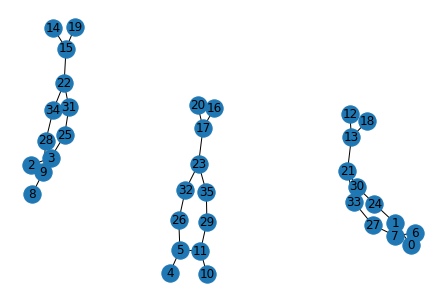

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()